# [Quick demo on GLM's](https://tsmatz.wordpress.com/2017/08/30/glm-regression-logistic-poisson-gaussian-gamma-tutorial-with-r/)
- [statsmodels](https://www.statsmodels.org/stable/glm.html)

In [135]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


##### [Example](https://stats.idre.ucla.edu/r/dae/poisson-regression/)
The number of awards earned by students at one high school. Predictors of the number of awards earned include the type of program in which the student was enrolled (e.g., vocational, general or academic) and the score on their final exam in math.

In [7]:
data = pd.read_csv('data/poisson_sim.csv')
data.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


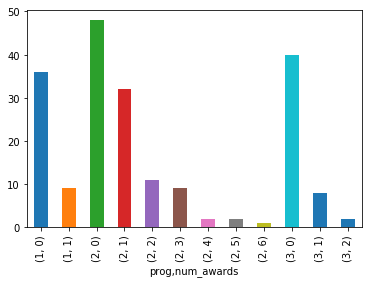

In [24]:
data.groupby('prog')['num_awards'].value_counts().plot.bar()

##### SM
- exog = x | independant variables
- endog = y | dependant variables

In [30]:
y = data[['num_awards']]
y.head()

,num_awards
0,0
1,0
2,0
3,0
4,0


In [53]:
D = pd.get_dummies(X['prog'])
D.rename(columns={1:'General',
                  2:'Academic',
                  3:'Vocational'},inplace=True)
data = data.merge(D,left_index=True,right_index=True,)

In [54]:
X = data[['Academic','Vocational','math']]
X = sm.add_constant(X)
X.head()

,const,Academic,Vocational,math
0,1.0,0,1,41
1,1.0,0,0,41
2,1.0,0,1,44
3,1.0,0,1,42
4,1.0,0,1,40


##### Poisson fit

In [56]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_model = poisson_model.fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Mon, 11 Mar 2019   Deviance:                       189.45
Time:                        20:23:51   Pearson chi2:                     212.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2471      0.658     -7.969      0.000      -6.538      -3.957
Academic       1.0839      0.358      3.025      0.002       0.382       1.786
Vocational     0.3698      0.441      0.838      0.402      -0.495       1.234
math           0.0702      0.011      6.619      0.000       0.049       0.091
==============================================================================
"""

### OLS Line Fit

In [65]:
from statsmodels.graphics.api import abline_plot

In [74]:
nobs = poisson_model.nobs
yY = y/y.sum()
yhat = poisson_model.mu

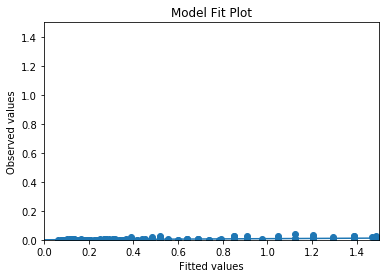

In [80]:
fig, ax = plt.subplots()

ax.scatter(yhat, yY)
line_fit = sm.OLS(yY, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5);

#### Generate Data
In the below:
- we see that the predicted number of events for level 1 of prog is about .21, holding math at its mean. 
- The predicted number of events for level 2 of prog is higher at .62.
- The predicted number of events for level 3 of prog is about .31. 

The ratios of these predicted counts ((frac{.625}{.211} = 2.96), (frac{.306}{.211} = 1.45)) match what we saw looking at the IRR.

In [131]:
test = pd.DataFrame({'const':[1.0]*3,
                     'Academic':[0,1,0],
                     'Vocational':[0,0,1],
                     'math':[data['math'].mean()]*3,
                     })

# make sure columns are in same order as for training!
poisson_model.predict(test)

0    0.211411
1    0.624945
2    0.306009
dtype: float64

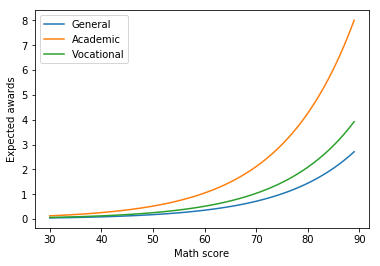

In [153]:
math_scores = np.arange(30,90)

gen = pd.DataFrame({'const':[1.0]*60,
                     'Academic':[0]*60,
                     'Vocational':[0]*60,
                     'math':math_scores,
                     })
aca = pd.DataFrame({'const':[1.0]*60,
                     'Academic':[1]*60,
                     'Vocational':[0]*60,
                     'math':math_scores,
                     })
voc = pd.DataFrame({'const':[1.0]*60,
                     'Academic':[0]*60,
                     'Vocational':[1]*60,
                     'math':math_scores,
                     })

fig, ax = plt.subplots()

ax.plot(math_scores, poisson_model.predict(gen),label='General')
ax.plot(math_scores, poisson_model.predict(aca),label='Academic')
ax.plot(math_scores, poisson_model.predict(voc),label='Vocational')
ax.legend()
ax.set_xlabel('Math score')
ax.set_ylabel('Expected awards');